<a href="https://colab.research.google.com/github/testtzlaffe/desafio-nlp-coronavirus-tweets/blob/main/DesafiosNLP_CoronavirusTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [1045]:
pd.set_option('display.max_colwidth', None)

In [1046]:
train_dataset = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
test_dataset = pd.read_csv('Corona_NLP_test.csv', encoding='latin-1')

In [1047]:
train_dataset.head(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive


In [1048]:
test_dataset.tail(2)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je rakyat assume 'lockdown' ke or even worst. Harini semua supermarket crowded like hell. Lagi mudah virus tu tersebar ?? #COVID2019,Extremely Negative
3797,3798,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to the safety of our employees and our end-users. We are monitoring COVID-19. Rest assured that tissue manufacturers are continuing to produce and ship products. https://t.co/qF6hclCAEq https://t.co/xyvbNsFeXA,Extremely Positive


In [1049]:
tweet_sentiment_columns = ['OriginalTweet', 'Sentiment']
train_dataset = train_dataset[tweet_sentiment_columns]
test_dataset = test_dataset[tweet_sentiment_columns]

In [1050]:
train_dataset.head(1)

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral


In [1051]:
test_dataset.head(1)

,OriginalTweet,Sentiment
0,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative


In [1052]:
train_dataset.shape

(41157, 2)

In [1053]:
test_dataset.shape

(3798, 2)

In [1054]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB


In [1055]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  3798 non-null   object
 1   Sentiment      3798 non-null   object
dtypes: object(2)
memory usage: 59.5+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


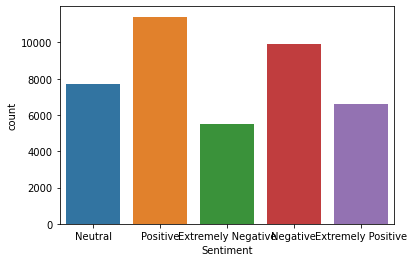

In [1056]:
sns.countplot(train_dataset['Sentiment'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


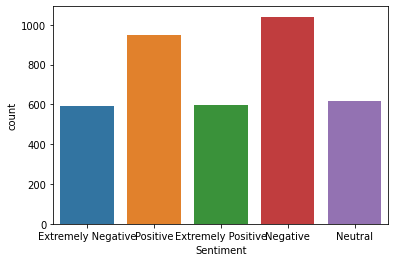

In [1057]:
sns.countplot(test_dataset['Sentiment'])

In [1058]:
train_dataset['Sentiment'].replace({'Extremely Positive': 'Positive', 'Extremely Negative': 'Negative'}, inplace=True)
test_dataset['Sentiment'].replace({'Extremely Positive': 'Positive', 'Extremely Negative': 'Negative'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


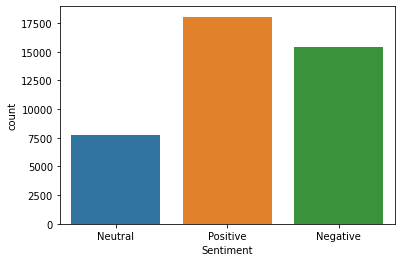

In [1059]:
sns.countplot(train_dataset['Sentiment'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


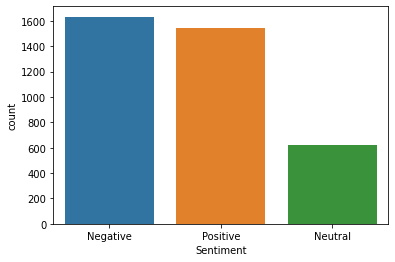

In [1060]:
sns.countplot(test_dataset['Sentiment'])

In [1061]:
'''train_dataset_negative = train_dataset[train_dataset['Sentiment']=='Negative']
train_dataset_negative = train_dataset_negative[0:15000]
train_dataset_positive = train_dataset[train_dataset['Sentiment']=='Positive']
train_dataset_positive = train_dataset_positive[0:15000]
train_dataset_neutral = train_dataset[train_dataset['Sentiment']=='Neutral']'''

"train_dataset_negative = train_dataset[train_dataset['Sentiment']=='Negative']\ntrain_dataset_negative = train_dataset_negative[0:15000]\ntrain_dataset_positive = train_dataset[train_dataset['Sentiment']=='Positive']\ntrain_dataset_positive = train_dataset_positive[0:15000]\ntrain_dataset_neutral = train_dataset[train_dataset['Sentiment']=='Neutral']"

In [1062]:
#train_dataset = pd.concat([train_dataset_positive, train_dataset_negative, train_dataset_neutral])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


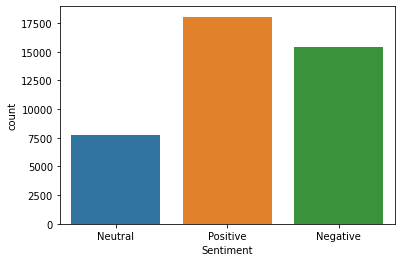

In [1063]:
sns.countplot(train_dataset['Sentiment'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


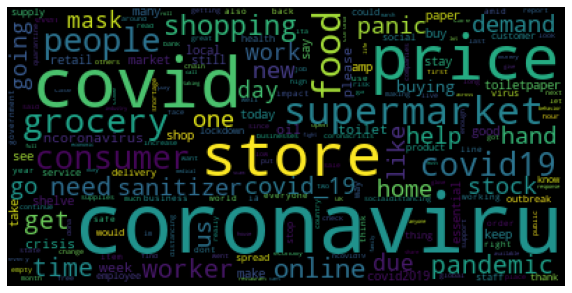

In [1064]:
# word cloud train dataset
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    s = s.replace('#','')
    s = s.replace(':','')
    s = s.replace(',','')
    s = s.replace('"','')
    s = s.replace("'",'')
    s = s.replace('?','')
    s = s.replace('!','')
    s = s.lower()
    return s

train_dataset['clean_tweet'] = train_dataset['OriginalTweet'].apply(clean_text)

text = train_dataset['clean_tweet'].to_string().lower()  

wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

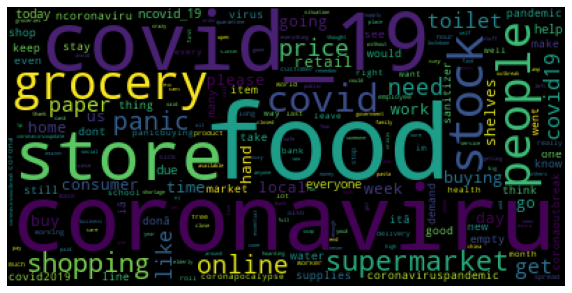

In [1065]:
# word cloud test dataset

test_dataset['clean_tweet'] = test_dataset['OriginalTweet'].apply(clean_text)

text = test_dataset['clean_tweet'].to_string().lower()  

wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [1066]:
train_dataset.head(5)

,OriginalTweet,Sentiment,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,and and
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid-19 outbreak
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,my food stock is not the only one which is empty...\r\r\n\r\r\nplease dont panic there will be enough food for everyone if you do not take more than you need. \r\r\nstay calm stay safe.\r\r\n\r\r\ncovid19france covid_19 covid19 coronavirus confinement confinementotal confinementgeneral
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Negative,me ready to go at supermarket during the covid19 outbreak.\r\r\n\r\r\nnot because im paranoid but because my food stock is litteraly empty. the coronavirus is a serious thing but please dont panic. it causes shortage...\r\r\n\r\r\ncoronavirusfrance restezchezvous stayathome confinement


In [1071]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
import nltk

nltk.download('punkt')

sw = stopwords.words('english')
sw.remove('not')
sw.remove("don't")
sw.remove("doesn't")
sw.remove("didn't")

stop_words = set(sw)  

def remove_stopwords(s): 
  
  word_tokens = word_tokenize(s)  
  filtered_sentence = [w for w in word_tokens if not w in stop_words]  
  return ' '.join(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [1072]:
train_dataset['clean_tweet'] = train_dataset['clean_tweet'].apply(remove_stopwords)
test_dataset['clean_tweet'] = test_dataset['clean_tweet'].apply(remove_stopwords)

In [1073]:
train_dataset.head(10)

,OriginalTweet,Sentiment,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds not order
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid-19 outbreak
3,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,food stock not one empty ... please dont panic enough food everyone not take need . stay calm stay safe . covid19france covid_19 covid19 coronavirus confinement confinementotal confinementgeneral
4,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Negative,ready go supermarket covid19 outbreak . not im paranoid food stock litteraly empty . coronavirus serious thing please dont panic . causes shortage ... coronavirusfrance restezchezvous stayathome confinement
5,"As news of the regionÂs first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU",Positive,news regionâs first confirmed covid-19 case came sullivan county last week people flocked area stores purchase cleaning supplies hand sanitizer food toilet paper goods reports
6,"Cashier at grocery store was sharing his insights on #Covid_19 To prove his credibility he commented ""I'm in Civics class so I know what I'm talking about"". https://t.co/ieFDNeHgDO",Positive,cashier grocery store sharing insights covid_19 prove credibility commented im civics class know im talking .
7,Was at the supermarket today. Didn't buy toilet paper. #Rebel\r\r\n\r\r\n#toiletpapercrisis #covid_19 https://t.co/eVXkQLIdAZ,Neutral,supermarket today . didnt buy toilet paper . rebel toiletpapercrisis covid_19
8,"Due to COVID-19 our retail store and classroom in Atlanta will not be open for walk-in business or classes for the next two weeks, beginning Monday, March 16. We will continue to process online and phone orders as normal! Thank you for your understanding! https://t.co/kw91zJ5O5i",Positive,due covid-19 retail store classroom atlanta not open walk-in business classes next two weeks beginning monday march 16. continue process online phone orders normal thank understanding
9,"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona",Negative,corona preventionwe stop buy things cash use online payment methods corona spread notes . also prefer online shopping home . time fight covid 19. govindia indiafightscorona


In [1074]:
test_dataset.tail(1)

,OriginalTweet,Sentiment,clean_tweet
3797,I and @ForestandPaper members are committed to the safety of our employees and our end-users. We are monitoring COVID-19. Rest assured that tissue manufacturers are continuing to produce and ship products. https://t.co/qF6hclCAEq https://t.co/xyvbNsFeXA,Positive,members committed safety employees end-users . monitoring covid-19 . rest assured tissue manufacturers continuing produce ship products .


In [1075]:
# importing modules 
from nltk.stem import SnowballStemmer 
from nltk.tokenize import word_tokenize 
   
snowball_stemmer = SnowballStemmer('english')

def stemmer(s):
  word_tokens = word_tokenize(s) 
  
  new_sentence = ''
  for w in word_tokens: 
    new_sentence = new_sentence + ' ' + snowball_stemmer.stem(w) 
  return new_sentence

In [1030]:
train_dataset['clean_tweet'] = train_dataset['clean_tweet'].apply(stemmer)
test_dataset['clean_tweet'] = test_dataset['clean_tweet'].apply(stemmer)

In [1076]:
train_dataset.head(3)

,OriginalTweet,Sentiment,clean_tweet
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,
1,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,advice talk neighbours family exchange phone numbers create contact list phone numbers neighbours schools employer chemist gp set online shopping accounts poss adequate supplies regular meds not order
2,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,coronavirus australia woolworths give elderly disabled dedicated shopping hours amid covid-19 outbreak


In [1077]:
test_dataset.head(3)

,OriginalTweet,Sentiment,clean_tweet
0,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Negative,trending new yorkers encounter empty supermarket shelves ( pictured wegmans brooklyn ) sold-out online grocers ( foodkick maxdelivery ) coronavirus-fearing shoppers stock
1,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive,couldnt find hand sanitizer fred meyer turned amazon . $ 114.97 2 pack purellcheck coronavirus concerns driving prices .
2,Find out how you can protect yourself and loved ones from #coronavirus. ?,Positive,find protect loved ones coronavirus .


In [1078]:
seed = 101 # fix random seed for reproducibility
np.random.seed(seed)

In [1079]:
# Encode Categorical Variable
X_train = train_dataset['clean_tweet']
y_train = pd.get_dummies(train_dataset['Sentiment']).values
num_classes = train_dataset['Sentiment'].nunique()
X_test = test_dataset['clean_tweet']
y_test = pd.get_dummies(test_dataset['Sentiment']).values
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(41157,) (3798,) (41157, 3) (3798, 3)


In [1080]:
# Tokenize Text
from keras.preprocessing.text import Tokenizer
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

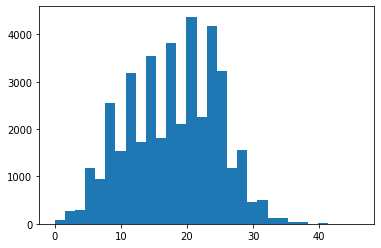

In [1081]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 30)
plt.show()

In [1082]:
from keras.preprocessing import sequence
max_words = 30
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)

(41157, 30) (3798, 30)


In [1083]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,Conv1D,MaxPooling1D,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

batch_size = 128
epochs = 1

In [1084]:
def get_model(max_features, embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    #model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    #model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())
    return model

In [1085]:
def model_train(model):
    # train the model
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size, verbose=2)
    # plot train history
    plot_model_history(model_history)

In [1086]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [1087]:
def model_evaluate(): 
    # predict class with test set
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis=1),y_pred_test)*100))
    
    #classification report
    print('\n')
    print(classification_report(np.argmax(y_test,axis=1), y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(np.argmax(y_test,axis=1), y_pred_test)

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 3)                 303       
Total params: 2,063,135
Trainable params: 2,063,135
Non-trainable params: 0
_________________________________________________________________
None
322/322 - 25s - loss: 0.6604 - acc: 0.7112 - val_loss: 0.4800 - val_acc: 0.8265


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


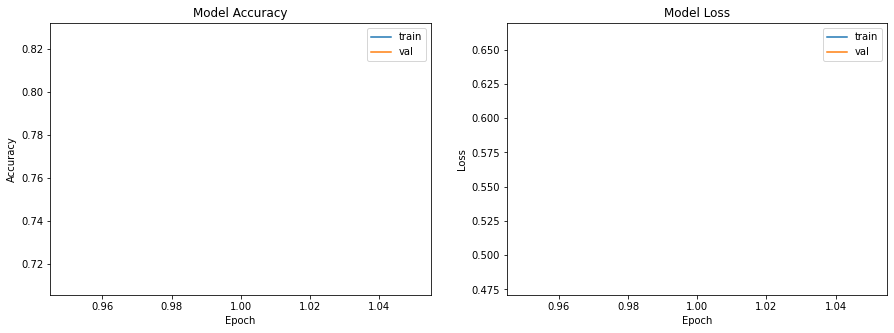

In [1088]:
# train the model
max_features = 20000
embed_dim = 100
model = get_model(max_features, embed_dim)
model_train(model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:	82.6%


              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1633
           1       0.77      0.75      0.76       619
           2       0.82      0.89      0.85      1546

    accuracy                           0.83      3798
   macro avg       0.82      0.81      0.81      3798
weighted avg       0.83      0.83      0.83      3798



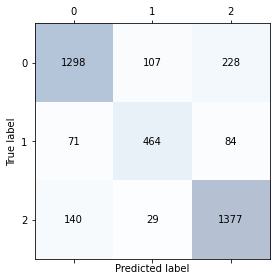

In [1089]:
# evaluate model with test set
model_evaluate()

In [775]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features=20000):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))
    
    # embedding matrix
    word_index = tokenizer.word_index
    
    num_words = min(max_features, len(word_index) + 1)
    
    all_embs = np.stack(embeddings_index.values()) #for random init
    
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return max_features, embedding_matrix

In [776]:
def get_model(max_features, embed_dim, embedding_matrix):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],
                       weights=[embedding_matrix]))#,trainable=False
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())
    return model

In [777]:
# embedding matrix
EMBEDDING_FILE = 'glove.6B.100d.txt'

In [778]:
#embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)

Found 400000 word vectors.


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 3)                 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


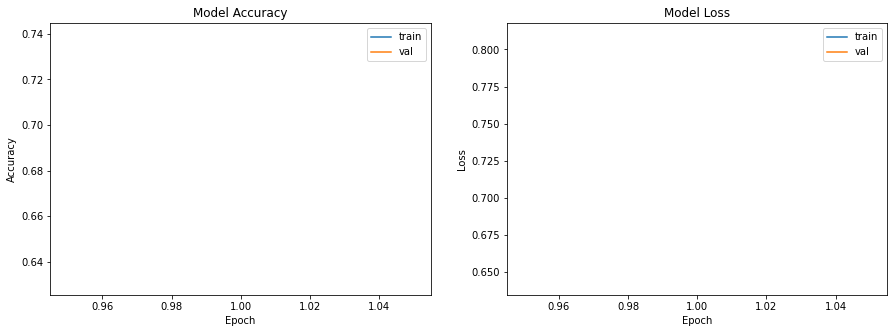

In [779]:
# train the model
model = get_model(max_features, embed_dim, embedding_matrix)
model_train(model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:	73.9%


              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1633
           1       0.62      0.62      0.62       619
           2       0.77      0.75      0.76      1546

    accuracy                           0.74      3798
   macro avg       0.71      0.72      0.71      3798
weighted avg       0.74      0.74      0.74      3798



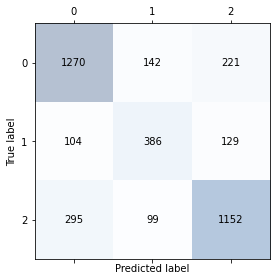

In [780]:
# evaluate model with test set
model_evaluate()

In [781]:
def get_model(max_features, embed_dim, embedding_matrix):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],
                       weights=[embedding_matrix],trainable=False))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))    
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())
    return model

Found 400000 word vectors.


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 30, 100)           2000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 30, 32)            9632      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 32)             0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 3)                 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


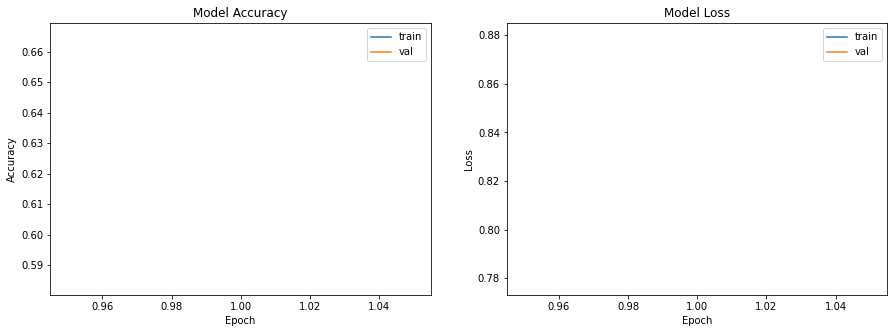

In [782]:
# embedding matrix
EMBEDDING_FILE = 'glove.6B.100d.txt'
embed_dim = 100 #word vector dim
max_features, embedding_matrix = get_embed_mat(EMBEDDING_FILE)

# train the model
model = get_model(max_features, embed_dim, embedding_matrix)
model_train(model)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy:	66.5%


              precision    recall  f1-score   support

           0       0.67      0.74      0.71      1633
           1       0.59      0.47      0.52       619
           2       0.68      0.66      0.67      1546

    accuracy                           0.67      3798
   macro avg       0.65      0.63      0.63      3798
weighted avg       0.66      0.67      0.66      3798



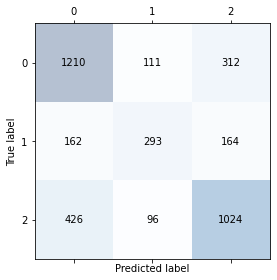

In [783]:
# evaluate model with test set
model_evaluate()